In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
fraud_data = pd.read_csv(r'C:\Users\Maintenant prêt\Desktop\PROJECTS\Fraud_Detection\data\Fraud_Data.csv')
                         

In [11]:
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [12]:
fraud_data.shape

(151112, 11)

In [13]:
fraud_data.describe()

,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


In [14]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [15]:
# convert data types
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])
fraud_data['purchase_value'] = pd.to_datetime(fraud_data['purchase_value'])
fraud_data['source'] = fraud_data['source'].astype('category')
fraud_data['browser'] = fraud_data['browser'].astype('category')
fraud_data['sex'] = fraud_data['sex'].astype('category')
# convert ip_address to int64
fraud_data['ip_address'] = fraud_data['ip_address'].astype('int64')

In [16]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  object        
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  datetime64[ns]
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  category      
 6   browser         151112 non-null  category      
 7   sex             151112 non-null  category      
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
dtypes: category(3), datetime64[ns](2), int64(4), object(2)
memory usage: 9.7+ MB


# Univariate analysis

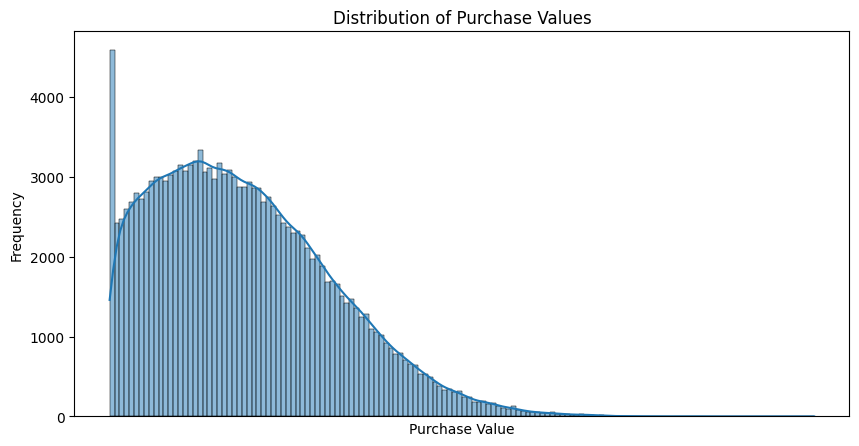

In [19]:
# distribution of puchase value
plt.figure(figsize=(10, 5))
sns.histplot(fraud_data['purchase_value'], kde=True)  
plt.title('Distribution of Purchase Values')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

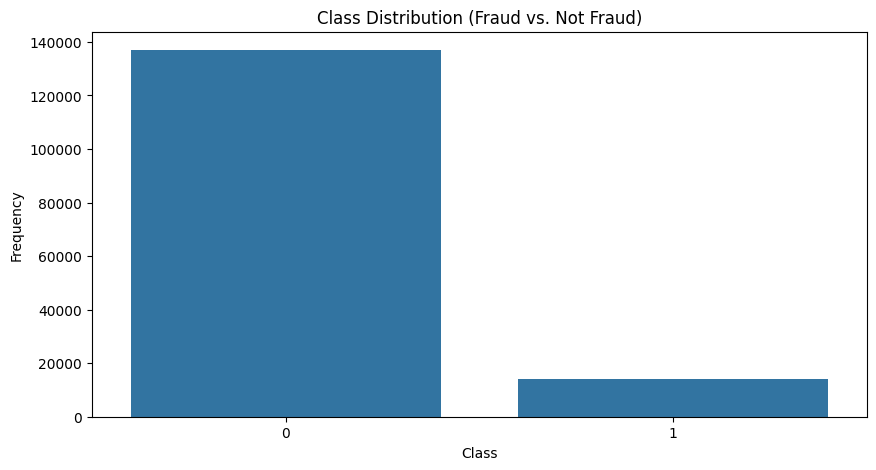

In [18]:
# class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='class', data=fraud_data)
plt.title('Class Distribution (Fraud vs. Not Fraud)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

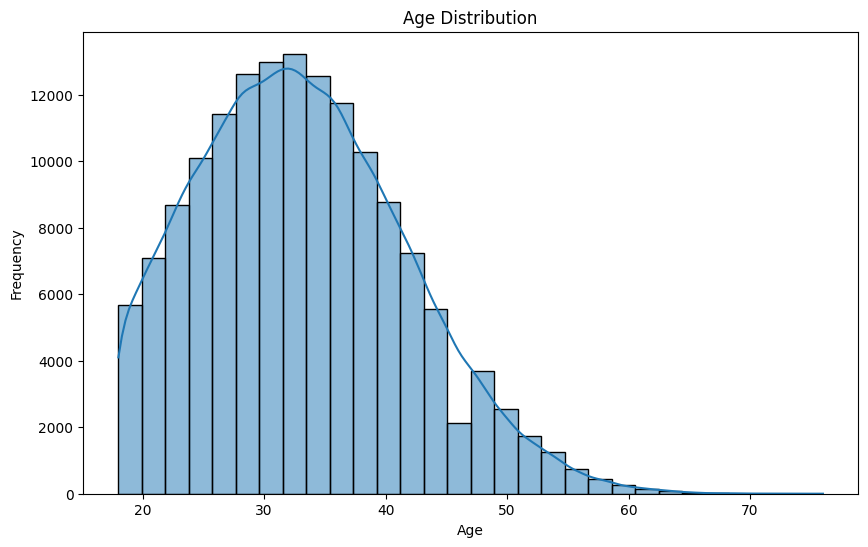

In [20]:
# Age Distribution Plot (Histogram with KDE)
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
sns.histplot(fraud_data['age'], kde=True, bins=30) # Added bins for granularity and KDE for smoother visualization
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

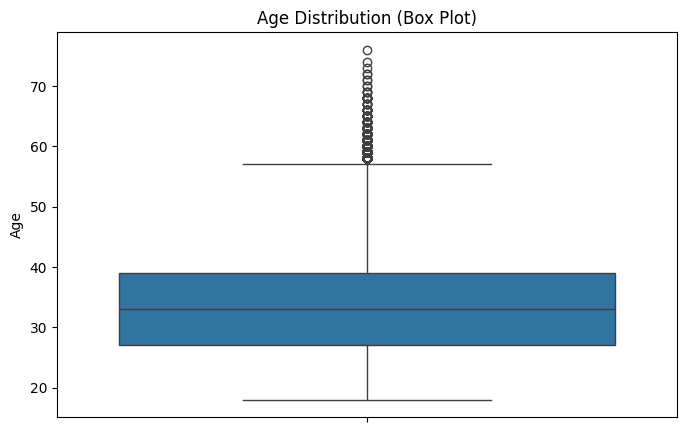

In [21]:
# Age Distribution Plot (Box Plot)
plt.figure(figsize=(8, 5))  
sns.boxplot(y=fraud_data['age']) 
plt.title('Age Distribution (Box Plot)')
plt.ylabel('Age')
plt.show()

In [26]:
import sys
import os
# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

In [27]:
from data_processing import univariate_analysis

In [30]:
plot_categorical

<function __main__.plot_categorical(data, column, title, figsize=(8, 5))>

In [29]:

def univariate_analysis(data):
    """Performs and displays univariate analysis on the given DataFrame."""

    def plot_categorical(data, column, title, figsize=(8, 5)):
        """Plots a categorical variable."""
        plt.figure(figsize=figsize)
        sns.countplot(x=column, data=data, order=data[column].value_counts().index)
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def plot_numerical(data, column, title, figsize=(10, 6), bins=30):  # Added bins parameter
        """Plots a numerical variable (histogram with KDE and box plot)."""
        plt.figure(figsize=figsize)
        sns.histplot(data[column], kde=True, bins=bins)  # Use bins parameter
        plt.title(title)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

        plt.figure(figsize=(8, 5))
        sns.boxplot(y=data[column])
        plt.title(title + " (Box Plot)")
        plt.ylabel(column)
        plt.show()

    # Categorical Variables
    plot_categorical(data, 'sex', 'Sex Distribution')
    plot_categorical(data, 'source', 'Source Distribution', figsize=(10, 6))
    plot_categorical(data, 'browser', 'Browser Distribution', figsize=(12, 7))
    plot_categorical(data, 'class', 'Class Distribution (Fraud vs. Not Fraud)')  # Class distribution

    # Numerical Variables
    plot_numerical(data, 'purchase_value', 'Distribution of Purchase Values')
    plot_numerical(data, 'age', 'Age Distribution') 
    
    
    plt.show()
     # Age distribution (histogram + boxplot)


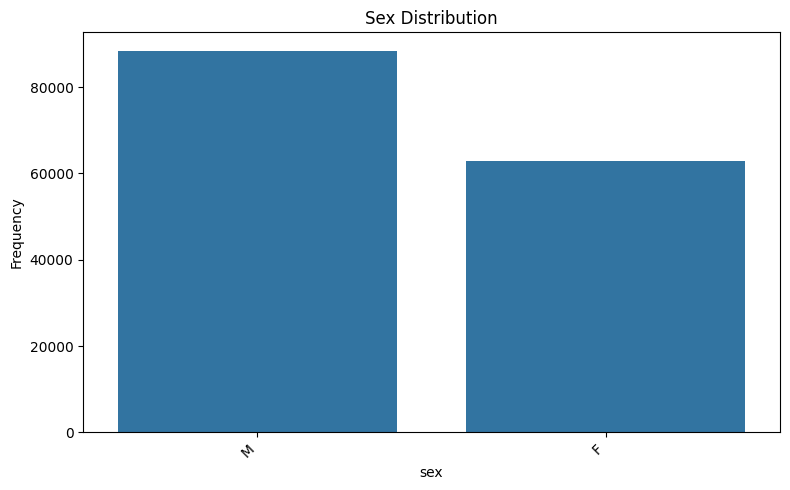

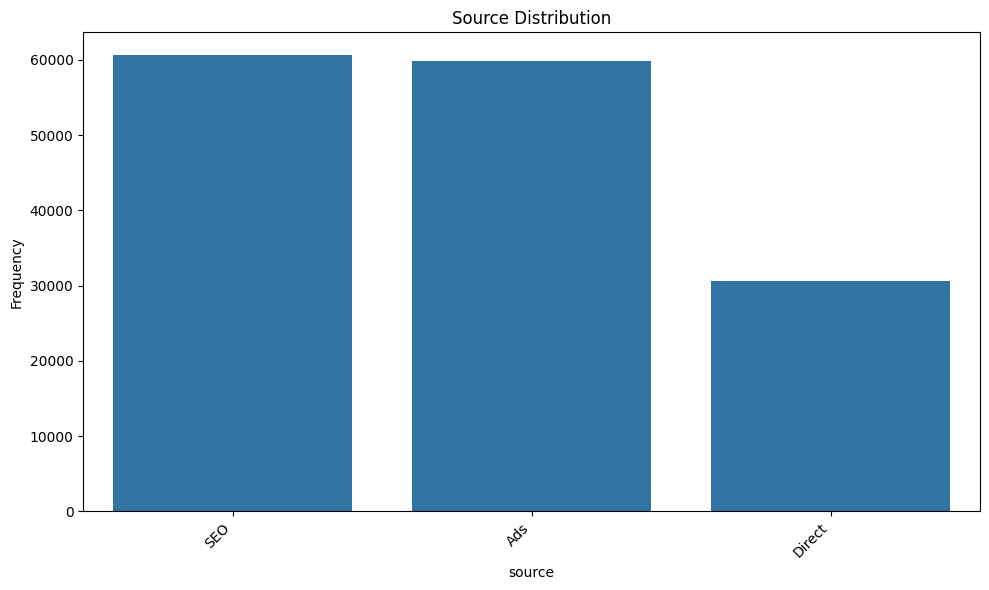

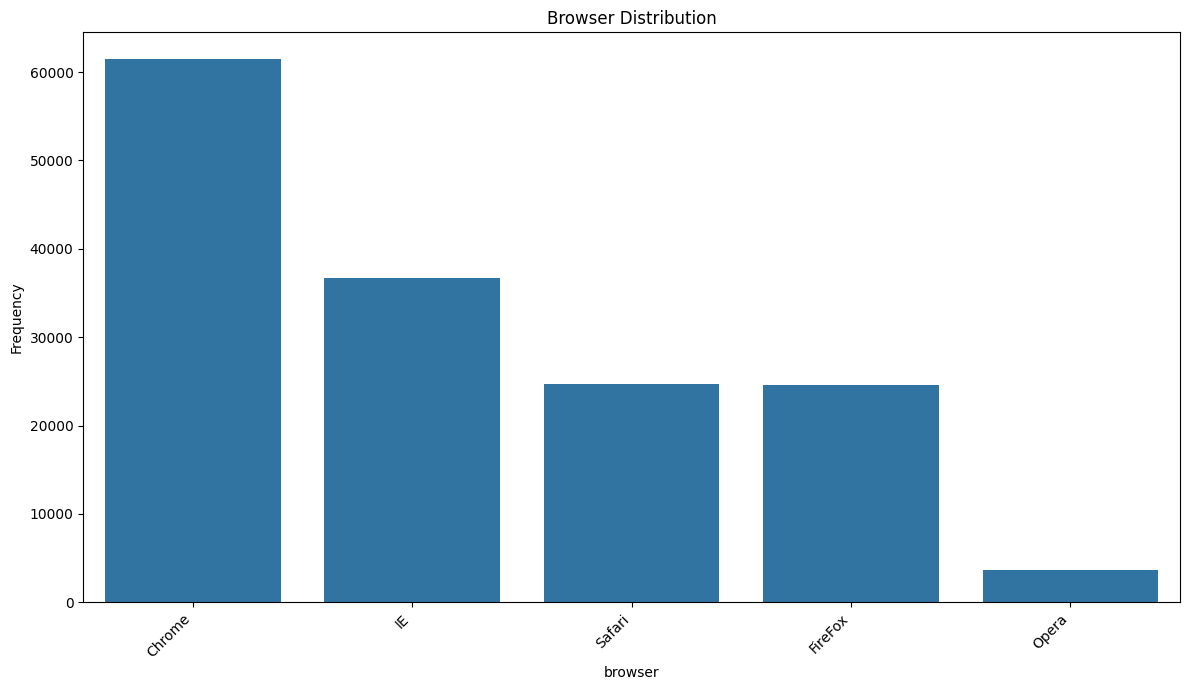

In [23]:
# Function for plotting categorical variables (reusable)
def plot_categorical(data, column, title, figsize=(8, 5)):  # Added figsize parameter
    plt.figure(figsize=figsize)  # Set figure size here or when calling the function
    sns.countplot(x=column, data=data, order=data[column].value_counts().index)  # Order by frequency
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Sex Distribution
plot_categorical(fraud_data, 'sex', 'Sex Distribution')

# Source Distribution
plot_categorical(fraud_data, 'source', 'Source Distribution', figsize=(10, 6))  # Wider for more categories

# Browser Distribution
plot_categorical(fraud_data, 'browser', 'Browser Distribution', figsize=(12, 7)) # Even wider if needed

